##### Problem_Statement

##### Importing_the_Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Data_Preprocessing

In [3]:
#Loading the data
data = pd.read_csv("Car_Price_Dataset.csv")

#Top few rows of the data
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


##### Features_Description

**ID**: Unique identifier for each car entry in the dataset.

**Price**: The target variable representing the price of the car (to be predicted).

**Levy**: The tax or fee imposed on the car purchase, which can impact the final price.

**Manufacturer**: The company that produced the car.

**Model**: The specific name or code representing the car's model.

**Prod. year**: The year in which the car was manufactured.

**Category**: The car's classification or type (e.g., sedan, SUV, coupe).

**Leather interior**: A binary indicator of whether the car has a leather interior (Yes/No).

**Fuel type**: The type of fuel the car uses (e.g., petrol, diesel, electric).

**Engine volume**: The engine's capacity or displacement in cubic centimeters (cc).

**Mileage**: The total distance the car has traveled in kilometers.

**Cylinders**: The number of cylinders in the car's engine.

**Gear box type**: The type of transmission (e.g., automatic, manual).

**Drive wheels**: The wheels that receive power from the engine (e.g., front-wheel drive, all-wheel drive).

**Doors**: The number of doors on the car.

**Wheel**: The type of steering wheel (e.g., left-hand drive, right-hand drive).

**Color**: The color of the car's exterior.

**Airbags**: The number of airbags installed in the car for safety.

In [4]:
#shape of the data
data.shape

(19237, 18)

In [5]:
#datatypes of the features
data.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [6]:
#Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

##### Data_Cleaning

In [7]:
#check for standard nullvalues
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
#Check for Non-Standard Null values
data['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [9]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [10]:
data['Model'].value_counts()

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64

In [11]:
data['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973],
      dtype=int64)

In [12]:
data['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [13]:
data['Leather interior'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [15]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [16]:
data['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [17]:
data['Cylinders'].value_counts()

4.0     14367
6.0      3462
8.0       991
5.0       169
3.0       107
2.0        42
1.0        38
12.0       38
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: Cylinders, dtype: int64

In [18]:
data['Gear box type'].value_counts()

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

In [19]:
data['Drive wheels'].value_counts()

Front    12874
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

In [20]:
data['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [21]:
data['Wheel'].value_counts()

Left wheel          17753
Right-hand drive     1484
Name: Wheel, dtype: int64

In [22]:
data['Color'].value_counts()

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

In [23]:
data['Airbags'].value_counts()

4     5823
12    5654
0     2405
8     1608
6     1311
2     1066
10     849
5      104
16      93
7       86
1       76
9       63
3       37
11      33
14      20
15       7
13       2
Name: Airbags, dtype: int64

In [24]:
#Levy feature
#Replacing the spl character with zero
data['Levy'].replace("-",0, inplace=True)

#reaplacing the zero with the median
data['Levy'].replace(0, data["Levy"].median(), inplace=True)

#Mileage
#Etracting the string("km") from the observations
data['Mileage'] = data['Mileage'].str.replace("km",'').astype(float)

#Replacing the "0" with median
data['Mileage'].replace(0, data['Mileage'].median(), inplace=True)

#Renaming the column as Mileage(km)
data.rename(columns = {"Mileage": "Mileage(km)"}, inplace=True)

#Doors
#Etracting the string("km") from the observations
data['Doors'] = data['Doors'].str.replace("-May",'').astype(object)
data['Doors'] = data['Doors'].str.replace("-Mar",'').astype(object)
data['Doors'] = data['Doors'].str.replace(">",'').astype(object)

In [25]:
# Extract 'Turbo' part of Engine volume into a new 'Engine Type' column
data['Engine_Type'] = data['Engine volume'].str.extract(r'(Turbo)')

# Replace 'Turbo' string with an empty string ('') to keep only the numeric values
data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')

# Convert the 'Engine volume' column to float
data['Engine volume'] = data['Engine volume'].astype(float)

# Fill missing values in 'Engine Type' column with an empty string ('')
data['Engine_Type'].fillna('', inplace=True)

#Fill empty observations with "No"  and 'TURBO' with "Yes"
data['Engine_Type'].replace(['', 'Turbo'], ["No","Yes"], inplace= True)

In [26]:
#Dropping the observations under 'სხვა' in Manufacturer feature
data.drop(data[data['Manufacturer'] == 'სხვა'].index, inplace=True)

In [27]:
# Reset the index after dropping rows (optional)
data.reset_index(drop=True, inplace=True)

In [28]:
#Shape of the data
data.shape

(19235, 19)

In [29]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage(km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_Type
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12,No
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8,No
2,45774419,8467,642.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2,No
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0,No
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4,No


In [30]:
#Data types of the features
data.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage(km)         float64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
Engine_Type          object
dtype: object

In [31]:
#changing the levy and product.Year data type
data['Levy'] = data['Levy'].astype(float)
data['Prod. year'] = data['Prod. year'].astype(str)
data['Airbags'] = data['Airbags'].astype(str)
data['Cylinders'] = data['Cylinders'].astype(str)

In [32]:
#Dropping the ID feature
data.drop("ID", axis = 1, inplace=True)

In [33]:
#Rename the Feature names
data.rename(columns={'Prod. year':'Prod_year', 'Leather interior':'Leather_interior', 'Fuel type':'Fuel_type', 'Engine volume':'Engine_volume', 'Gear box type':'Gear_box_type', 'Drive wheels':'Drive_wheels'}, inplace = True)

##### Descriptive Stats

##### Measures of Central Tendency

In [34]:
#segregating the numeric and categorical features
df_num = data.select_dtypes(include=[int, float])
df_cat = data.select_dtypes(include=[object])

In [35]:
#calculating the Mean
mean = df_num.mean()
print(mean)

Price            1.855606e+04
Levy             8.267465e+02
Engine_volume    2.307991e+00
Mileage(km)      1.537096e+06
dtype: float64


In [36]:
#calculating the Median
median = df_num.median()
print(median)

Price             13172.0
Levy                642.0
Engine_volume         2.0
Mileage(km)      126000.0
dtype: float64


In [37]:
#calculating the mode
mode = data.mode()
mode

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage(km),Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_Type
0,15681,642.0,HYUNDAI,Prius,2012,Sedan,Yes,Petrol,2.0,126000.0,4.0,Automatic,Front,04,Left wheel,Black,4,No


##### Measures of Dispersion

In [38]:
#calculating the Range
Range = df_num.max() - df_num.min()
Range

Price            2.630750e+07
Levy             1.162700e+04
Engine_volume    2.000000e+01
Mileage(km)      2.147484e+09
dtype: float64

In [39]:
#Calculating the standard Deviation
std_dev = df_num.std()
std_dev

Price            1.905912e+05
Levy             4.044789e+02
Engine_volume    8.778501e-01
Mileage(km)      4.840624e+07
dtype: float64

In [40]:
#Calculating the Variance
var = df_num.var()
var

Price            3.632499e+10
Levy             1.636032e+05
Engine_volume    7.706209e-01
Mileage(km)      2.343164e+15
dtype: float64

##### Skewness

In [41]:
#Calculating the Skweness
skewness = df_num.skew()
skewness

Price            136.463368
Levy               6.177036
Engine_volume      2.186125
Mileage(km)       38.894849
dtype: float64

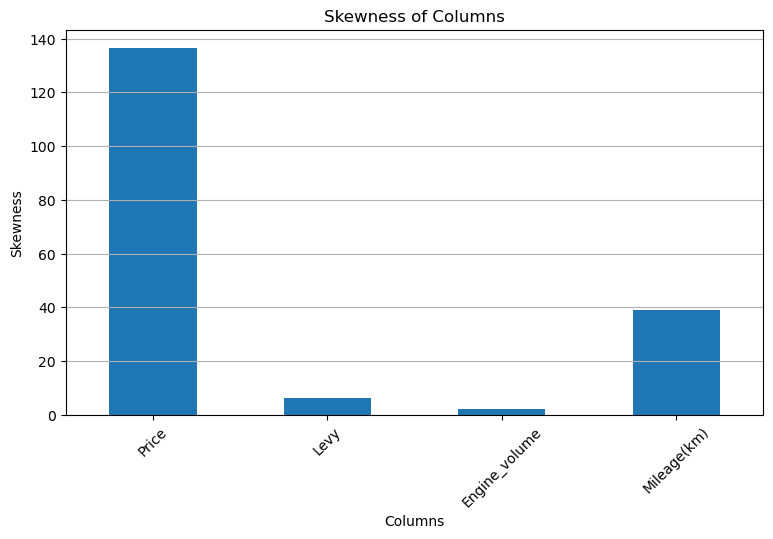

In [42]:
# Plotting the skewness values
plt.figure(figsize=(9, 5))
skewness.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Columns')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

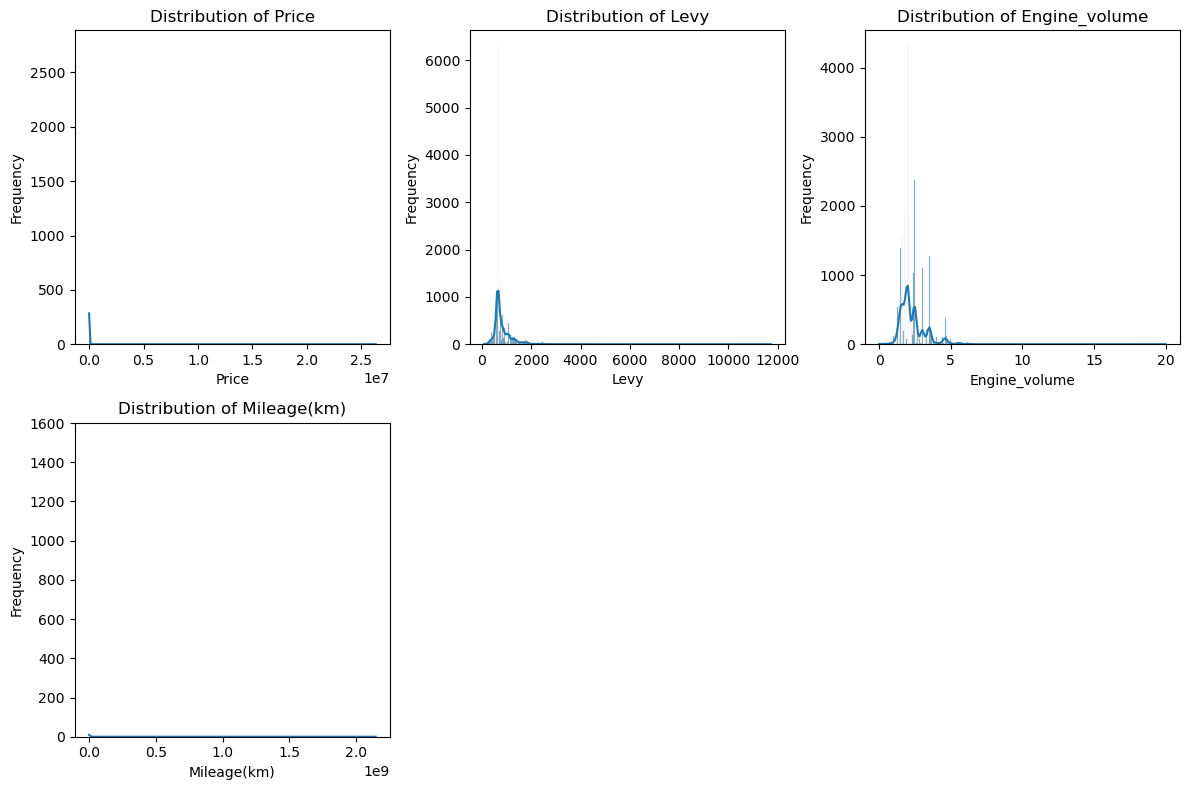

In [43]:
#Distribution plots
plt.figure(figsize=(12, 8))

# Loop through each numeric column and create distribution plots
for i, column in enumerate(df_num.columns):
    plt.subplot(2, 3, i+1)  # Create a subplot for each column
    sns.histplot(df_num[column], kde=True)  # Create the distribution plot with a kernel density estimate (KDE)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

In [44]:
#Treating the Outliers
q3 = data.quantile(0.75)
q1 = data.quantile(0.25)
print(q3)
print(q1)

#calculating the IQR
IQR = q3-q1
print(IQR)

Price             22069.0
Levy                917.0
Engine_volume         2.5
Mileage(km)      188844.0
Name: 0.75, dtype: float64
Price             5331.0
Levy               642.0
Engine_volume        1.8
Mileage(km)      79055.0
Name: 0.25, dtype: float64
Price             16738.0
Levy                275.0
Engine_volume         0.7
Mileage(km)      109789.0
dtype: float64


In [45]:
#calculating the upper limit
ul = q3+(1.5*IQR)

#Calculating the lower_limit
ll = q1-(1.5*IQR)
print(ul)
print(ll)

Price             47176.00
Levy               1329.50
Engine_volume         3.55
Mileage(km)      353527.50
dtype: float64
Price           -19776.00
Levy               229.50
Engine_volume        0.75
Mileage(km)     -85628.50
dtype: float64


In [46]:
#Count of outliers
print(data[data<ll].count())
print(data[data>ul].count())

Price                0
Levy                22
Manufacturer         0
Model                0
Prod_year            0
Category             0
Leather_interior     0
Fuel_type            0
Engine_volume       84
Mileage(km)          0
Cylinders            0
Gear_box_type        0
Drive_wheels         0
Doors                0
Wheel                0
Color                0
Airbags              0
Engine_Type          0
dtype: int64
Price               1073
Levy                1575
Manufacturer           0
Model                  0
Prod_year              0
Category               0
Leather_interior       0
Fuel_type              0
Engine_volume       1297
Mileage(km)          737
Cylinders              0
Gear_box_type          0
Drive_wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Engine_Type            0
dtype: int64


In [47]:
#dropping the outliers
df = data[~((data > ul).any(axis=1) | (data < ll).any(axis=1))]

#shape of data
df.shape

(15519, 18)

In [48]:
#Treating the Outliers
q3 = df.quantile(0.75)
q1 = df.quantile(0.25)
print(q3)
print(q1)

#calculating the IQR
IQR = q3-q1
print(IQR)

Price             20385.0
Levy                831.0
Engine_volume         2.5
Mileage(km)      177000.0
Name: 0.75, dtype: float64
Price             5645.0
Levy               642.0
Engine_volume        1.6
Mileage(km)      79055.0
Name: 0.25, dtype: float64
Price            14740.0
Levy               189.0
Engine_volume        0.9
Mileage(km)      97945.0
dtype: float64


In [49]:
#calculating the upper limit
ul = q3+(1.5*IQR)

#Calculating the lower_limit
ll = q1-(1.5*IQR)
print(ul)
print(ll)

Price             42495.00
Levy               1114.50
Engine_volume         3.85
Mileage(km)      323917.50
dtype: float64
Price           -16465.00
Levy               358.50
Engine_volume        0.25
Mileage(km)     -67862.50
dtype: float64


In [50]:
#Count of outliers
print(df[df<ll].count())
print(df[df>ul].count())

Price                 0
Levy                310
Manufacturer          0
Model                 0
Prod_year             0
Category              0
Leather_interior      0
Fuel_type             0
Engine_volume         0
Mileage(km)           0
Cylinders             0
Gear_box_type         0
Drive_wheels          0
Doors                 0
Wheel                 0
Color                 0
Airbags               0
Engine_Type           0
dtype: int64
Price               377
Levy                914
Manufacturer          0
Model                 0
Prod_year             0
Category              0
Leather_interior      0
Fuel_type             0
Engine_volume         0
Mileage(km)         159
Cylinders             0
Gear_box_type         0
Drive_wheels          0
Doors                 0
Wheel                 0
Color                 0
Airbags               0
Engine_Type           0
dtype: int64


In [51]:
#dropping the outliers
df_1 = df[~((df > ul).any(axis=1) | (df < ll).any(axis=1))]

#shape of data
df_1.shape

(13822, 18)

In [52]:
#Treating the Outliers
q3 = df_1.quantile(0.75)
q1 = df_1.quantile(0.25)
print(q3)
print(q1)

#calculating the IQR
IQR = q3-q1
print(IQR)

Price             20266.0
Levy                779.0
Engine_volume         2.5
Mileage(km)      177080.0
Name: 0.75, dtype: float64
Price             5802.0
Levy               642.0
Engine_volume        1.6
Mileage(km)      81000.0
Name: 0.25, dtype: float64
Price            14464.0
Levy               137.0
Engine_volume        0.9
Mileage(km)      96080.0
dtype: float64


In [53]:
#calculating the upper limit
ul = q3+(1.5*IQR)

#Calculating the lower_limit
ll = q1-(1.5*IQR)
print(ul)
print(ll)

Price             41962.00
Levy                984.50
Engine_volume         3.85
Mileage(km)      321200.00
dtype: float64
Price           -15894.00
Levy               436.50
Engine_volume        0.25
Mileage(km)     -63120.00
dtype: float64


In [54]:
#Count of outliers
print(df_1[df_1<ll].count())
print(df_1[df_1>ul].count())

Price                 0
Levy                345
Manufacturer          0
Model                 0
Prod_year             0
Category              0
Leather_interior      0
Fuel_type             0
Engine_volume         0
Mileage(km)           0
Cylinders             0
Gear_box_type         0
Drive_wheels          0
Doors                 0
Wheel                 0
Color                 0
Airbags               0
Engine_Type           0
dtype: int64
Price                 55
Levy                1269
Manufacturer           0
Model                  0
Prod_year              0
Category               0
Leather_interior       0
Fuel_type              0
Engine_volume          0
Mileage(km)           16
Cylinders              0
Gear_box_type          0
Drive_wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Engine_Type            0
dtype: int64


In [55]:
#dropping the outliers
df_2 = df_1[~((df_1 > ul).any(axis=1) | (df_1 < ll).any(axis=1))]

#shape of data
df_2.shape

(12149, 18)

In [56]:
#Treating the Outliers
q3 = df_2.quantile(0.75)
q1 = df_2.quantile(0.25)
print(q3)
print(q1)

#calculating the IQR
IQR = q3-q1
print(IQR)

Price             20228.0
Levy                761.0
Engine_volume         2.4
Mileage(km)      178637.0
Name: 0.75, dtype: float64
Price             6595.0
Levy               642.0
Engine_volume        1.6
Mileage(km)      84000.0
Name: 0.25, dtype: float64
Price            13633.0
Levy               119.0
Engine_volume        0.8
Mileage(km)      94637.0
dtype: float64


In [57]:
#calculating the upper limit
ul = q3+(1.5*IQR)

#Calculating the lower_limit
ll = q1-(1.5*IQR)
print(ul)
print(ll)

Price             40677.5
Levy                939.5
Engine_volume         3.6
Mileage(km)      320592.5
dtype: float64
Price           -13854.5
Levy               463.5
Engine_volume        0.4
Mileage(km)     -57955.5
dtype: float64


In [58]:
#Count of outliers
print(df_2[df_2<ll].count())
print(df_2[df_2>ul].count())

Price                 0
Levy                111
Manufacturer          0
Model                 0
Prod_year             0
Category              0
Leather_interior      0
Fuel_type             0
Engine_volume         0
Mileage(km)           0
Cylinders             0
Gear_box_type         0
Drive_wheels          0
Doors                 0
Wheel                 0
Color                 0
Airbags               0
Engine_Type           0
dtype: int64
Price               85
Levy                84
Manufacturer         0
Model                0
Prod_year            0
Category             0
Leather_interior     0
Fuel_type            0
Engine_volume        0
Mileage(km)          1
Cylinders            0
Gear_box_type        0
Drive_wheels         0
Doors                0
Wheel                0
Color                0
Airbags              0
Engine_Type          0
dtype: int64


In [59]:
#dropping the outliers
df_3 = df_2[~((df_2 > ul).any(axis=1) | (df_2 < ll).any(axis=1))]

#shape of data
df_3.shape

(11873, 18)

In [60]:
#Treating the Outliers
q3 = df_3.quantile(0.75)
q1 = df_3.quantile(0.25)
print(q3)
print(q1)

#calculating the IQR
IQR = q3-q1
print(IQR)

Price             20071.0
Levy                761.0
Engine_volume         2.4
Mileage(km)      179664.0
Name: 0.75, dtype: float64
Price             6743.0
Levy               642.0
Engine_volume        1.6
Mileage(km)      85500.0
Name: 0.25, dtype: float64
Price            13328.0
Levy               119.0
Engine_volume        0.8
Mileage(km)      94164.0
dtype: float64


In [61]:
#calculating the upper limit
ul = q3+(1.5*IQR)

#Calculating the lower_limit
ll = q1-(1.5*IQR)
print(ul)
print(ll)

Price             40063.0
Levy                939.5
Engine_volume         3.6
Mileage(km)      320910.0
dtype: float64
Price           -13249.0
Levy               463.5
Engine_volume        0.4
Mileage(km)     -55746.0
dtype: float64


In [62]:
#Count of outliers
print(df_3[df_3<ll].count())
print(df_3[df_3>ul].count())

Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage(km)         0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Engine_Type         0
dtype: int64
Price               40
Levy                 0
Manufacturer         0
Model                0
Prod_year            0
Category             0
Leather_interior     0
Fuel_type            0
Engine_volume        0
Mileage(km)          0
Cylinders            0
Gear_box_type        0
Drive_wheels         0
Doors                0
Wheel                0
Color                0
Airbags              0
Engine_Type          0
dtype: int64


In [63]:
#dropping the outliers
df_4 = df_3[~((df_3 > ul).any(axis=1))]

#shape of data
df_4.shape

(11833, 18)

In [64]:
#Treating the Outliers
q3 = df_4.quantile(0.75)
q1 = df_4.quantile(0.25)
print(q3)
print(q1)

#calculating the IQR
IQR = q3-q1
print(IQR)

Price             20005.0
Levy                761.0
Engine_volume         2.4
Mileage(km)      179918.0
Name: 0.75, dtype: float64
Price             6586.0
Levy               642.0
Engine_volume        1.6
Mileage(km)      86000.0
Name: 0.25, dtype: float64
Price            13419.0
Levy               119.0
Engine_volume        0.8
Mileage(km)      93918.0
dtype: float64


In [65]:
#calculating the upper limit
ul = q3+(1.5*IQR)

#Calculating the lower_limit
ll = q1-(1.5*IQR)
print(ul)
print(ll)

Price             40133.5
Levy                939.5
Engine_volume         3.6
Mileage(km)      320795.0
dtype: float64
Price           -13542.5
Levy               463.5
Engine_volume        0.4
Mileage(km)     -54877.0
dtype: float64


In [66]:
#Count of outliers
print(df_4[df_4<ll].count())
print(df_4[df_4>ul].count())

Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage(km)         0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Engine_Type         0
dtype: int64
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage(km)         0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Engine_Type         0
dtype: int64


In [67]:
#segregating the numeric and categorical features
df_n = df_4.select_dtypes(include=[int, float]) #numerical Features
df_c = df_4.select_dtypes(include=[object])     #categorical Features

In [68]:
#Calculating the Skweness
skewness = df_n.skew()
skewness

Price            0.495060
Levy             0.678881
Engine_volume    0.743232
Mileage(km)      0.350899
dtype: float64

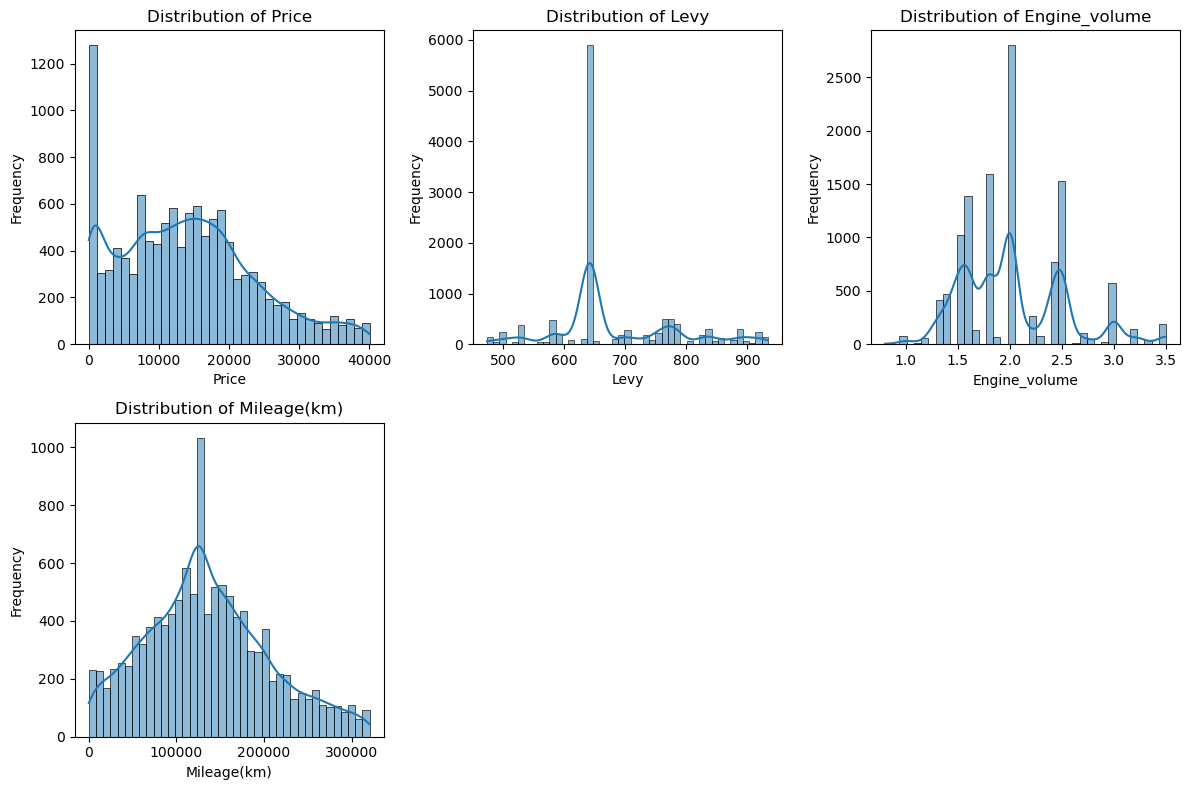

In [69]:
#Distribution plots
plt.figure(figsize=(12, 8))

# Loop through each numeric column and create distribution plots
for i, column in enumerate(df_n.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_n[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

##### Kurtosis

In [70]:
kurtosis = df_n.kurtosis()
kurtosis

Price           -0.308294
Levy             0.100808
Engine_volume    0.272583
Mileage(km)     -0.259095
dtype: float64

##### Measures of Central Tendency (after convertingg the data into Normal Distribution)

In [71]:
#Mean
mean = df_n.mean()
mean

Price             14039.019775
Levy                681.504014
Engine_volume         2.019843
Mileage(km)      135202.959182
dtype: float64

In [72]:
#median
median = df_n.median()
median

Price             13485.0
Levy                642.0
Engine_volume         2.0
Mileage(km)      127000.0
dtype: float64

In [73]:
#mode of numerical features
mode_num = df_n.mode()
mode_num

,Price,Levy,Engine_volume,Mileage(km)
0,15681,642.0,2.0,126000.0


In [74]:
#mode_categorical features
mode_cat = df_c.mode()
mode_cat

,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_Type
0,HYUNDAI,Elantra,2012,Sedan,Yes,Petrol,4.0,Automatic,Front,04,Left wheel,White,4,No


##### Measures of Dispersion (after convertingg the data into Normal Distribution)

In [75]:
#calculating the Range
Range = df_n.max() - df_n.min()
Range

Price             40056.0
Levy                461.0
Engine_volume         2.7
Mileage(km)      320569.0
dtype: float64

In [76]:
#calculating the standarad deviation
std_dev = df_n.std()
std_dev

Price             9608.844317
Levy               100.230808
Engine_volume        0.501037
Mileage(km)      70738.432305
dtype: float64

In [77]:
#calculating the variance
var = df_n.var()
var

Price            9.232989e+07
Levy             1.004621e+04
Engine_volume    2.510379e-01
Mileage(km)      5.003926e+09
dtype: float64

##### Exploratory Data Analysis

##### Univariate Analysis

##### Frequency Distribution Table (Categorical Features)

In [78]:
Manufacturer = pd.crosstab(index=df_c['Manufacturer'], columns='Frequency')
Manufacturer_1 = Manufacturer.sort_values(by='Frequency', ascending=False)
Manufacturer_1

col_0,Frequency
Manufacturer,
HYUNDAI,2523
TOYOTA,2264
MERCEDES-BENZ,800
CHEVROLET,772
FORD,691
HONDA,681
BMW,598
NISSAN,533
VOLKSWAGEN,517


In [79]:
Model = pd.crosstab(index=df_c['Model'], columns='Frequency')
Model_1 = Model.sort_values(by='Frequency', ascending=False)
Model_1

col_0,Frequency
Model,
Elantra,824
Prius,807
Camry,626
Sonata,620
Tucson,329
...,...
C 240 w203,1
C 240 W 203,1
C 230 2.5,1


In [80]:
Prod_year = pd.crosstab(index=df_c['Prod_year'], columns='Frequency')
Prod_year_1 = Prod_year.sort_values(by='Frequency', ascending=False)
Prod_year_1

col_0,Frequency
Prod_year,
2012,1633
2013,1566
2014,1188
2011,1073
2015,848
2010,837
2016,689
2008,361
2005,314


In [81]:
Category = pd.crosstab(index=df_c['Category'], columns='Frequency')
Category_1 = Category.sort_values(by='Frequency', ascending=False)
Category_1

col_0,Frequency
Category,
Sedan,5814
Jeep,2548
Hatchback,2134
Minivan,448
Coupe,298
Microbus,193
Goods wagon,178
Universal,175
Pickup,22


In [82]:
Leather_interior = pd.crosstab(index=df_c['Leather_interior'], columns='Frequency')
Leather_interior_1 = Leather_interior.sort_values(by='Frequency', ascending=False)
Leather_interior_1

col_0,Frequency
Leather_interior,
Yes,7639
No,4194


In [83]:
Fuel_type = pd.crosstab(index=df_c['Fuel_type'], columns='Frequency')
Fuel_type_1 = Fuel_type.sort_values(by='Frequency', ascending=False)
Fuel_type_1

col_0,Frequency
Fuel_type,
Petrol,6576
Diesel,2208
Hybrid,2077
LPG,506
CNG,399
Plug-in Hybrid,66
Hydrogen,1


In [84]:
Cylinders = pd.crosstab(index=df_c['Cylinders'], columns='Frequency')
Cylinders_1 = Cylinders.sort_values(by='Frequency', ascending=False)
Cylinders_1

col_0,Frequency
Cylinders,
4.0,10141
6.0,1356
5.0,142
3.0,59
8.0,54
2.0,35
1.0,22
12.0,13
10.0,4


In [85]:
Gear_box_type = pd.crosstab(index=df_c['Gear_box_type'], columns='Frequency')
Gear_box_type_1 = Gear_box_type.sort_values(by='Frequency', ascending=False)
Gear_box_type_1

col_0,Frequency
Gear_box_type,
Automatic,7718
Tiptronic,2056
Manual,1469
Variator,590


In [86]:
Drive_wheels = pd.crosstab(index=df_c['Drive_wheels'], columns='Frequency')
Drive_wheels_1 = Drive_wheels.sort_values(by='Frequency', ascending=False)
Drive_wheels_1

col_0,Frequency
Drive_wheels,
Front,8954
4x4,1627
Rear,1252


In [87]:
Doors = pd.crosstab(index=df_c['Doors'], columns='Frequency')
Doors_1 = Doors.sort_values(by='Frequency', ascending=False)
Doors_1

col_0,Frequency
Doors,
04,11228
02,515
5,90


In [88]:
Wheel = pd.crosstab(index=df_c['Wheel'], columns='Frequency')
Wheel_1 = Wheel.sort_values(by='Frequency', ascending=False)
Wheel_1

col_0,Frequency
Wheel,
Left wheel,10685
Right-hand drive,1148


In [89]:
Color = pd.crosstab(index=df_c['Color'], columns='Frequency')
Color_1 = Color.sort_values(by='Frequency', ascending=False)
Color_1

col_0,Frequency
Color,
White,2866
Black,2615
Silver,2558
Grey,1448
Blue,938
Red,448
Green,220
Carnelian red,139
Golden,116


In [90]:
Airbags = pd.crosstab(index=df_c['Airbags'], columns='Frequency')
Airbags_1 = Airbags.sort_values(by='Frequency', ascending=False)
Airbags_1

col_0,Frequency
Airbags,
4,3853
12,2525
0,1391
8,1246
6,1045
2,786
10,602
5,85
7,67


In [91]:
Engine_Type = pd.crosstab(index=df_c['Engine_Type'], columns='Frequency')
Engine_Type_1 = Engine_Type.sort_values(by='Frequency', ascending=False)
Engine_Type_1

col_0,Frequency
Engine_Type,
No,10531
Yes,1302


##### Histograms for Numerical Features

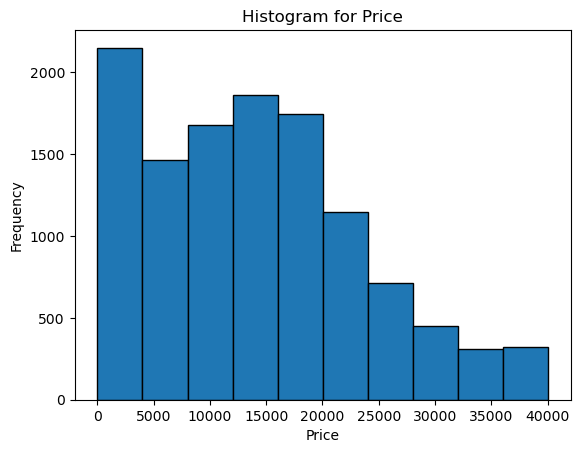

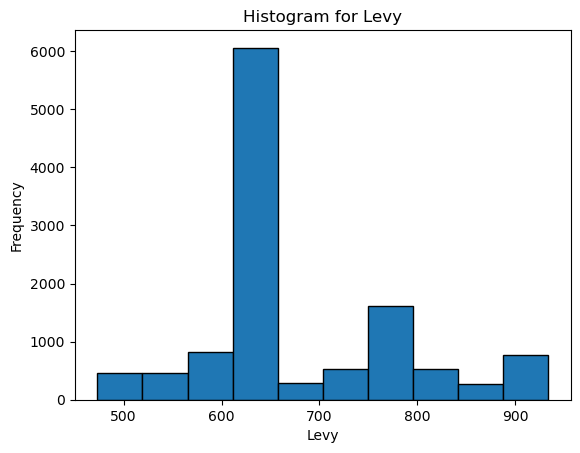

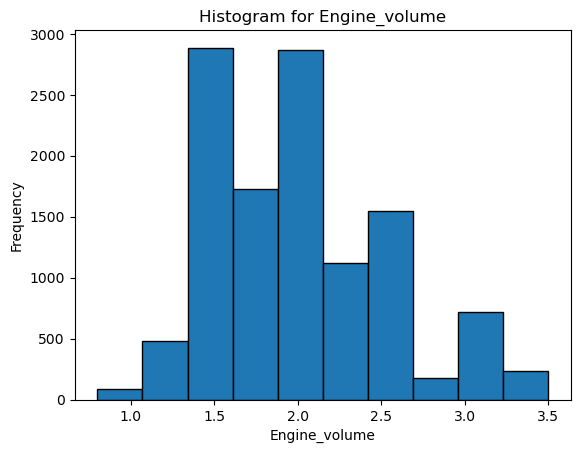

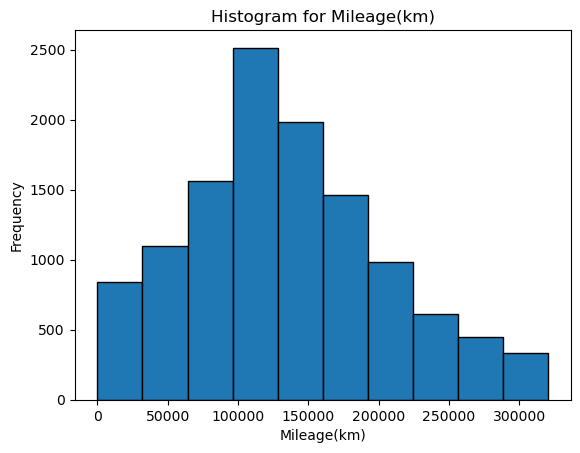

In [92]:
columns = df_n.columns
for i in columns:
    plt.hist(df_4[i], bins=10, edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Histogram for ' + i)
    plt.show()

##### Bivariate Analysis

In [93]:
Price = df_n['Price']
df_n.drop("Price", axis=1, inplace = True)

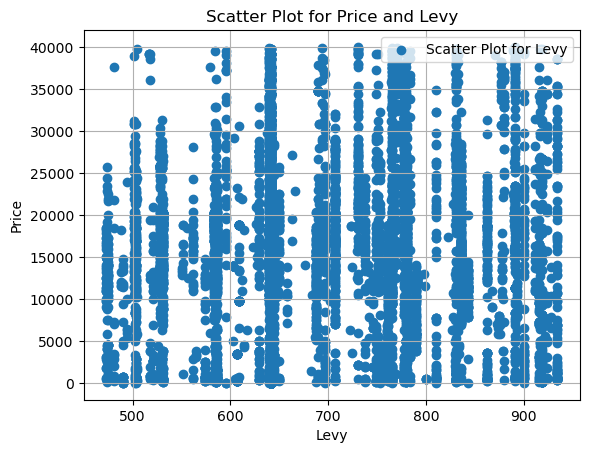

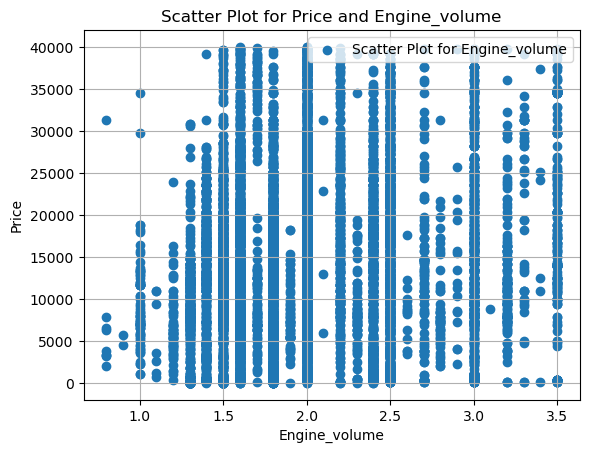

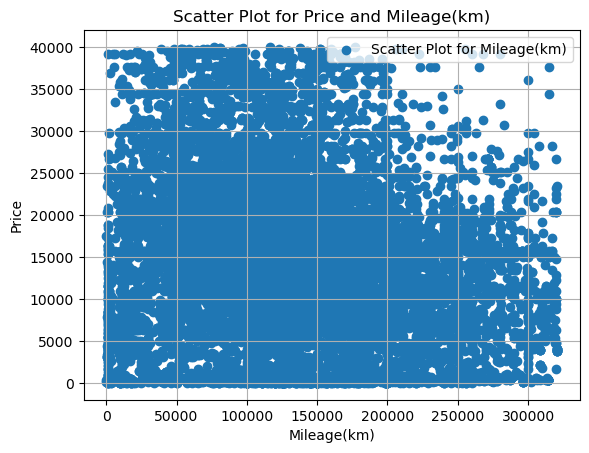

In [94]:
columns = df_n.columns
for i in columns:
    plt.scatter(x=df_n[i], y=Price, label=f'Scatter Plot for {i}')
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot for Price and {i}')
    plt.legend()
    plt.grid(True)
    plt.show()

<AxesSubplot:xlabel='Manufacturer'>

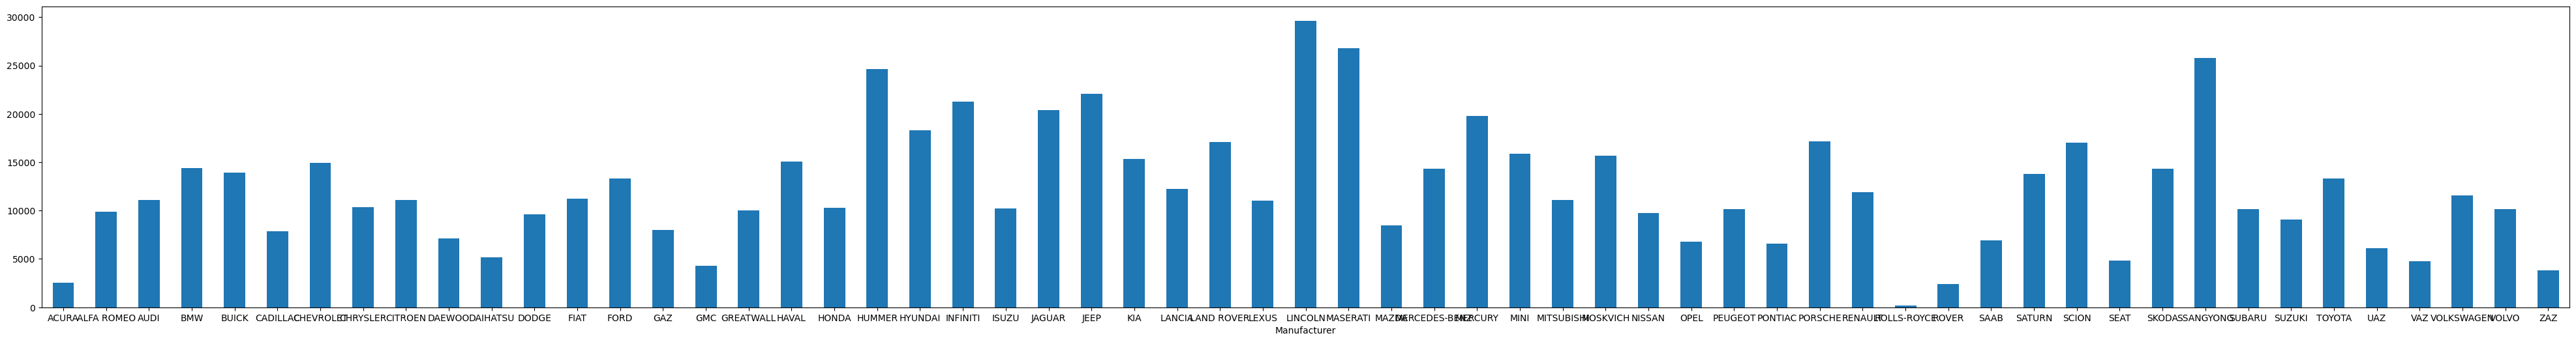

In [95]:
mean_price_by_manufacturer = df.groupby(df_c['Manufacturer'])['Price'].mean()
plt.figure(figsize=(50, 6))
mean_price_by_manufacturer.plot.bar(rot=0)

In [96]:
mean_price_by_manufacturer

Manufacturer
ACURA             2532.000000
ALFA ROMEO        9890.250000
AUDI             11116.969697
BMW              14379.060201
BUICK            13955.636364
CADILLAC          7872.000000
CHEVROLET        14940.632124
CHRYSLER         10361.733333
CITROEN          11124.400000
DAEWOO            7087.714286
DAIHATSU          5180.714286
DODGE             9592.783784
FIAT             11209.155844
FORD             13301.525326
GAZ               7981.125000
GMC               4272.833333
GREATWALL        10036.000000
HAVAL            15053.000000
HONDA            10286.493392
HUMMER           24618.000000
HYUNDAI          18332.608799
INFINITI         21262.466667
ISUZU            10244.666667
JAGUAR           20396.200000
JEEP             22100.023810
KIA              15355.607595
LANCIA           12231.000000
LAND ROVER       17065.272727
LEXUS            10997.721154
LINCOLN          29636.000000
MASERATI         26813.500000
MAZDA             8487.858268
MERCEDES-BENZ    14337.6475

<AxesSubplot:xlabel='Model'>

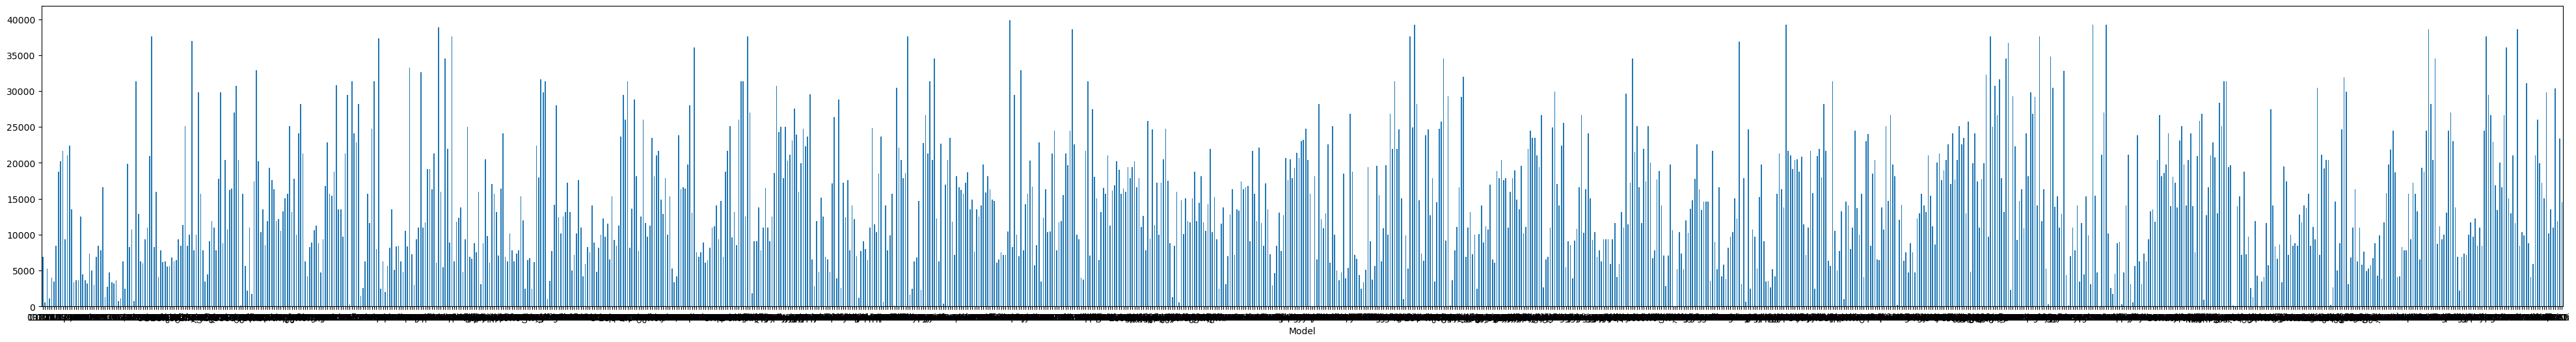

In [97]:
mean_price_by_Model = df.groupby(df_c['Model'])['Price'].mean()
plt.figure(figsize=(50, 6))
mean_price_by_Model.plot.bar(rot=0)

In [98]:
mean_price_by_Model

Model
09-Mar      6920.000000
100          549.000000
100 NX      5331.000000
1000        1090.363636
1111        4000.000000
               ...     
i20        10976.000000
i40        30351.000000
iA isti    11917.000000
tC         23362.500000
xD         14531.000000
Name: Price, Length: 1134, dtype: float64

<AxesSubplot:xlabel='Prod_year'>

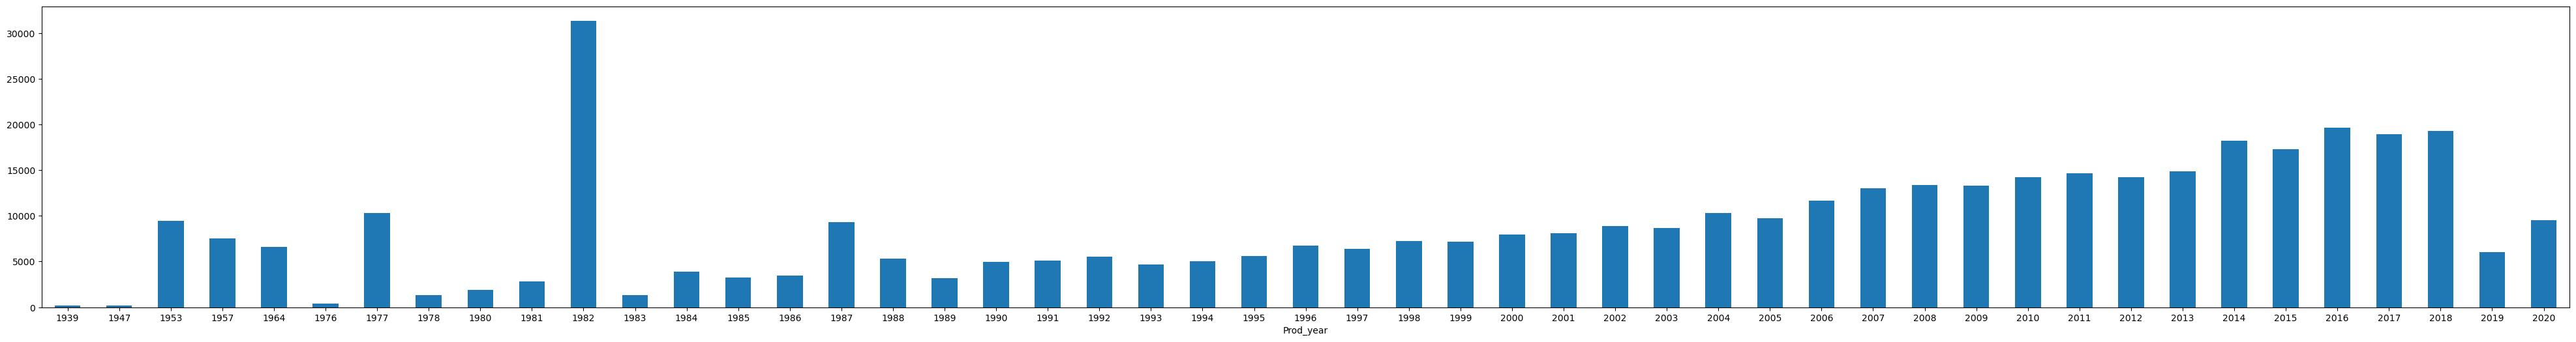

In [99]:
mean_price_by_Prod_year = df.groupby(df_c['Prod_year'])['Price'].mean()
plt.figure(figsize=(50, 6))
mean_price_by_Prod_year.plot.bar(rot=0)

In [100]:
mean_price_by_Prod_year

Prod_year
1939      178.500000
1947      150.000000
1953     9440.500000
1957     7527.000000
1964     6585.500000
1976      400.000000
1977    10340.500000
1978     1300.000000
1980     1925.000000
1981     2800.000000
1982    31361.000000
1983     1300.000000
1984     3881.500000
1985     3244.666667
1986     3440.250000
1987     9310.750000
1988     5289.100000
1989     3189.400000
1990     4943.916667
1991     5081.142857
1992     5525.230769
1993     4695.500000
1994     5015.057143
1995     5573.555556
1996     6739.045977
1997     6384.170543
1998     7235.885246
1999     7197.552326
2000     7975.537118
2001     8083.190244
2002     8850.519685
2003     8633.040541
2004    10288.259786
2005     9722.933121
2006    11643.358974
2007    13015.455598
2008    13350.828255
2009    13327.689769
2010    14252.749104
2011    14676.042870
2012    14204.723209
2013    14857.997446
2014    18190.075758
2015    17308.424528
2016    19649.648766
2017    18929.896694
2018    19275.585714
201

<AxesSubplot:xlabel='Category'>

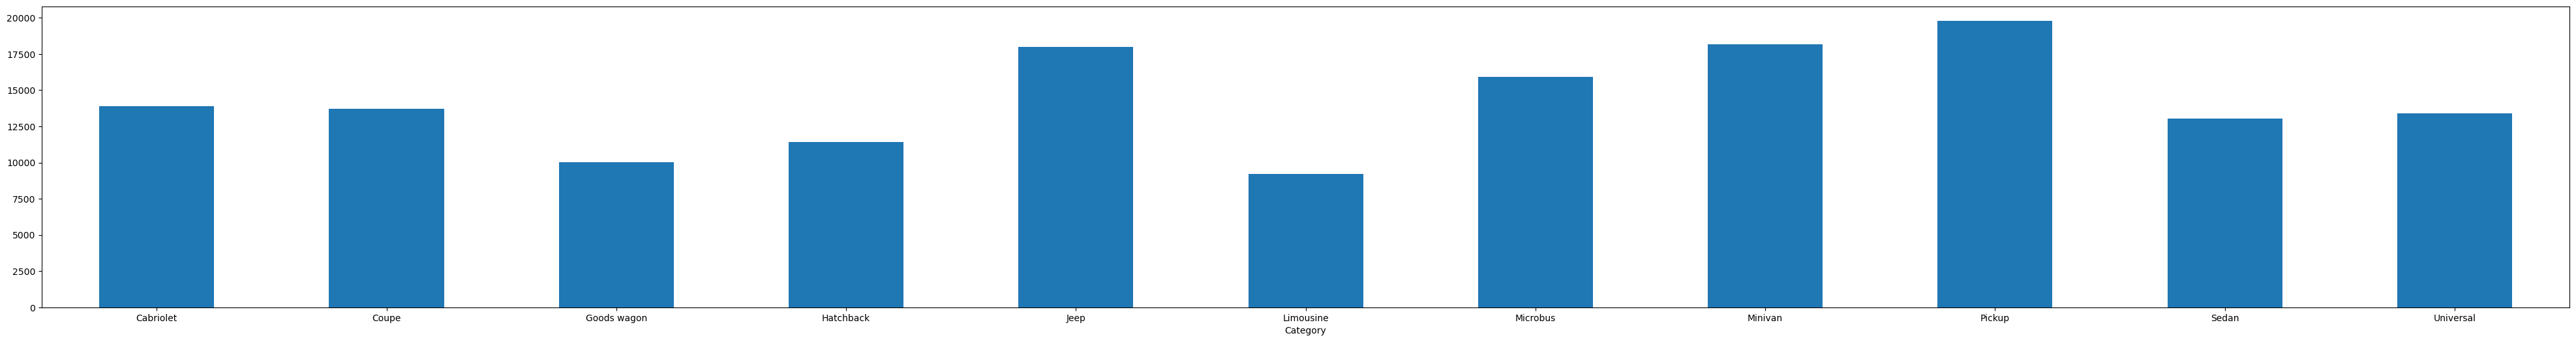

In [101]:
mean_price_by_Category = df.groupby(df_c['Category'])['Price'].mean()
plt.figure(figsize=(50, 6))
mean_price_by_Category.plot.bar(rot=0)

In [102]:
mean_price_by_Category

Category
Cabriolet      13891.058824
Coupe          13713.338926
Goods wagon    10036.606742
Hatchback      11400.817245
Jeep           17979.271586
Limousine       9231.500000
Microbus       15900.139896
Minivan        18168.455357
Pickup         19805.863636
Sedan          13042.582043
Universal      13400.394286
Name: Price, dtype: float64

<AxesSubplot:xlabel='Leather_interior'>

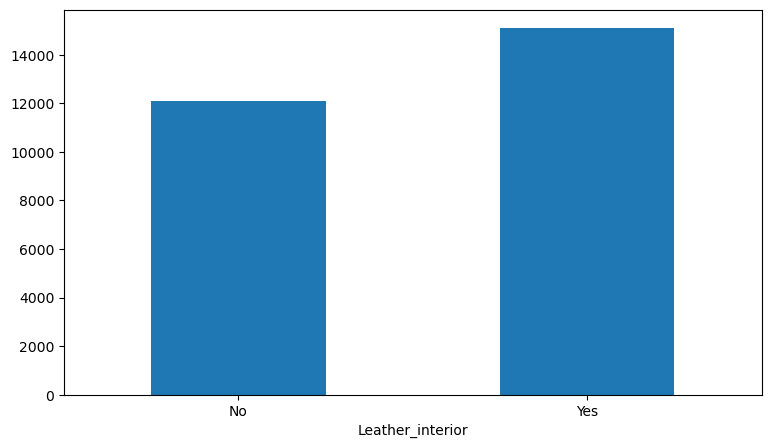

In [103]:
mean_price_by_Leather_interior = df.groupby(df_c['Leather_interior'])['Price'].mean()
plt.figure(figsize=(9, 5))
mean_price_by_Leather_interior.plot.bar(rot=0)

In [104]:
mean_price_by_Leather_interior

Leather_interior
No     12086.455174
Yes    15111.026051
Name: Price, dtype: float64

<AxesSubplot:xlabel='Fuel_type'>

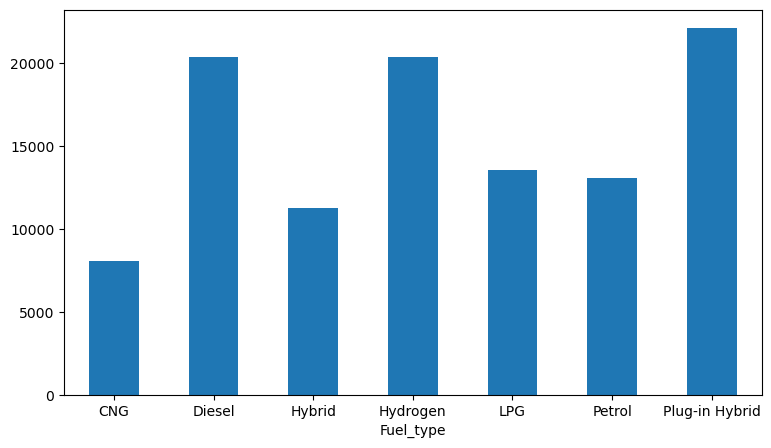

In [105]:
mean_price_by_Fuel_type = df.groupby(df_c['Fuel_type'])['Price'].mean()
plt.figure(figsize=(9, 5))
mean_price_by_Fuel_type.plot.bar(rot=0)

In [106]:
mean_price_by_Fuel_type

Fuel_type
CNG                8038.270677
Diesel            20398.291667
Hybrid            11246.841598
Hydrogen          20385.000000
LPG               13559.895257
Petrol            13104.374696
Plug-in Hybrid    22140.500000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Cylinders'>

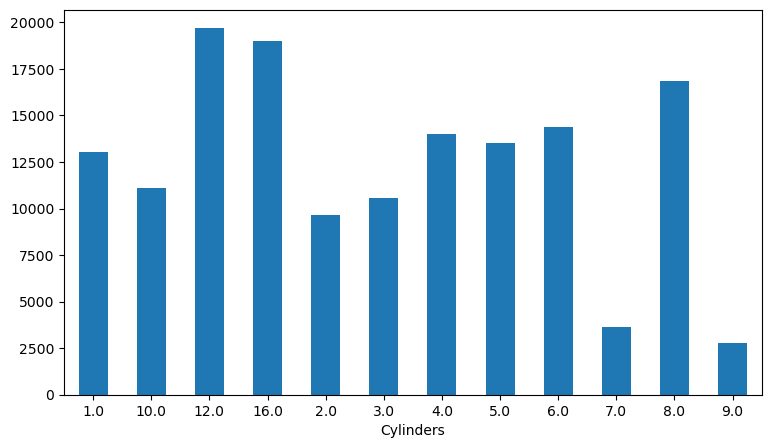

In [107]:
mean_price_by_Cylinders = df.groupby(df_c['Cylinders'])['Price'].mean()
plt.figure(figsize=(9, 5))
mean_price_by_Cylinders.plot.bar(rot=0)

In [108]:
mean_price_by_Cylinders

Cylinders
1.0     13033.863636
10.0    11079.750000
12.0    19693.461538
16.0    18998.750000
2.0      9655.171429
3.0     10561.152542
4.0     14018.630806
5.0     13522.316901
6.0     14378.294985
7.0      3621.500000
8.0     16842.462963
9.0      2800.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Gear_box_type'>

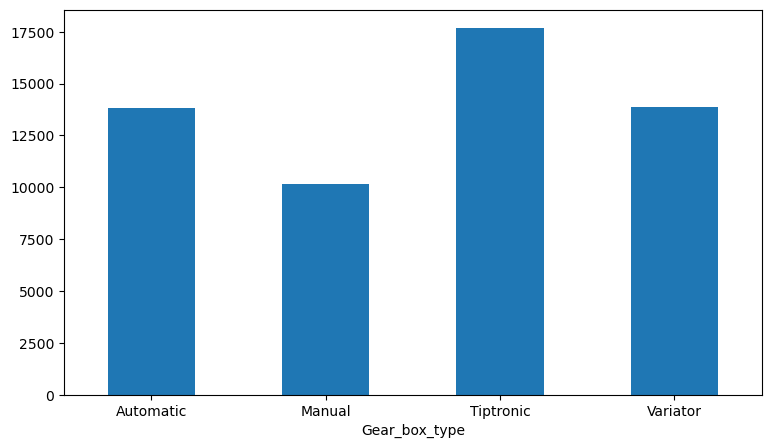

In [109]:
mean_price_by_Gear_box_type = df.groupby(df_c['Gear_box_type'])['Price'].mean()
plt.figure(figsize=(9 , 5))
mean_price_by_Gear_box_type.plot.bar(rot=0)

In [110]:
mean_price_by_Gear_box_type

Gear_box_type
Automatic    13824.953744
Manual       10133.254595
Tiptronic    17680.437743
Variator     13874.571186
Name: Price, dtype: float64

<AxesSubplot:xlabel='Drive_wheels'>

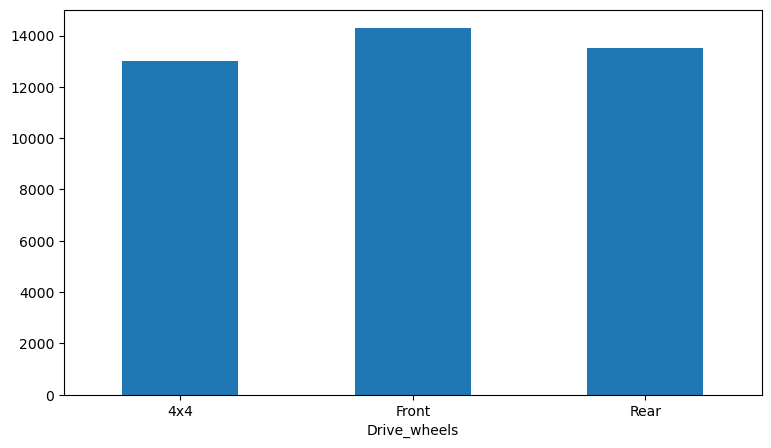

In [111]:
mean_price_by_Drive_wheels = df.groupby(df_c['Drive_wheels'])['Price'].mean()
plt.figure(figsize=(9, 5))
mean_price_by_Drive_wheels.plot.bar(rot=0)

In [112]:
mean_price_by_Drive_wheels

Drive_wheels
4x4      12998.408113
Front    14298.828903
Rear     13533.224441
Name: Price, dtype: float64

<AxesSubplot:xlabel='Doors'>

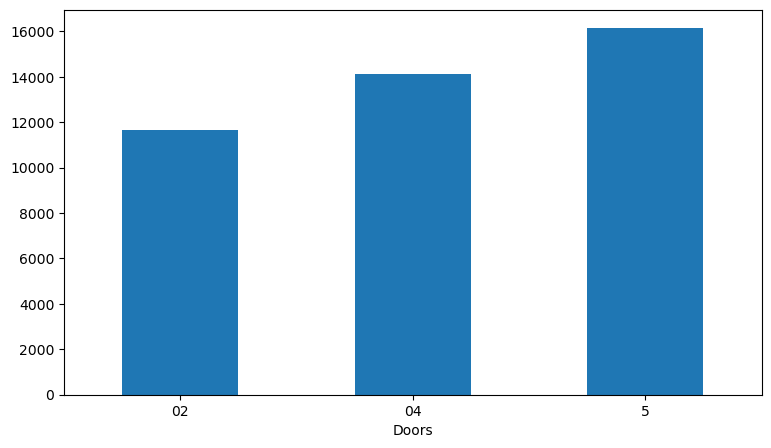

In [113]:
mean_price_by_Doors = df.groupby(df_c['Doors'])['Price'].mean()
plt.figure(figsize=(9, 5))
mean_price_by_Doors.plot.bar(rot=0)

In [114]:
mean_price_by_Doors

Doors
02    11677.108738
04    14130.482276
5     16143.944444
Name: Price, dtype: float64

<AxesSubplot:xlabel='Wheel'>

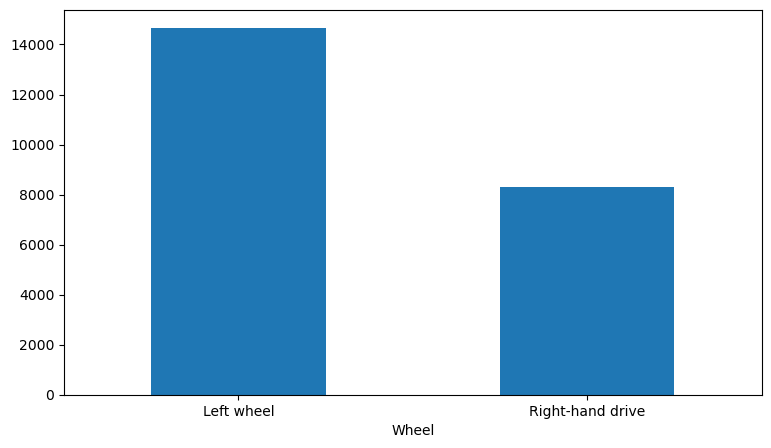

In [115]:
mean_price_by_Wheel = df.groupby(df_c['Wheel'])['Price'].mean()
plt.figure(figsize=(9, 5))
mean_price_by_Wheel.plot.bar(rot=0)

In [116]:
mean_price_by_Wheel

Wheel
Left wheel          14656.010856
Right-hand drive     8296.380662
Name: Price, dtype: float64

<AxesSubplot:xlabel='Color'>

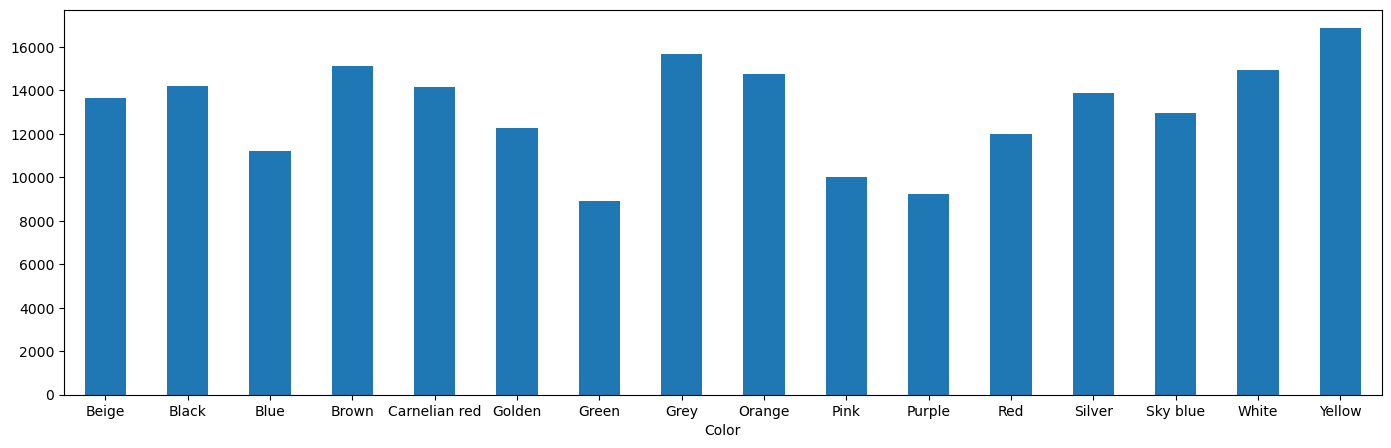

In [117]:
mean_price_by_Color = df.groupby(df_c['Color'])['Price'].mean()
plt.figure(figsize=(17, 5))
mean_price_by_Color.plot.bar(rot=0)

In [118]:
mean_price_by_Color

Color
Beige            13645.178218
Black            14207.730402
Blue             11204.738806
Brown            15113.450450
Carnelian red    14168.748201
Golden           12252.543103
Green             8893.240909
Grey             15655.732044
Orange           14763.981818
Pink             10013.000000
Purple            9241.548387
Red              11986.149554
Silver           13886.058249
Sky blue         12960.412371
White            14917.640963
Yellow           16869.521127
Name: Price, dtype: float64

<AxesSubplot:xlabel='Airbags'>

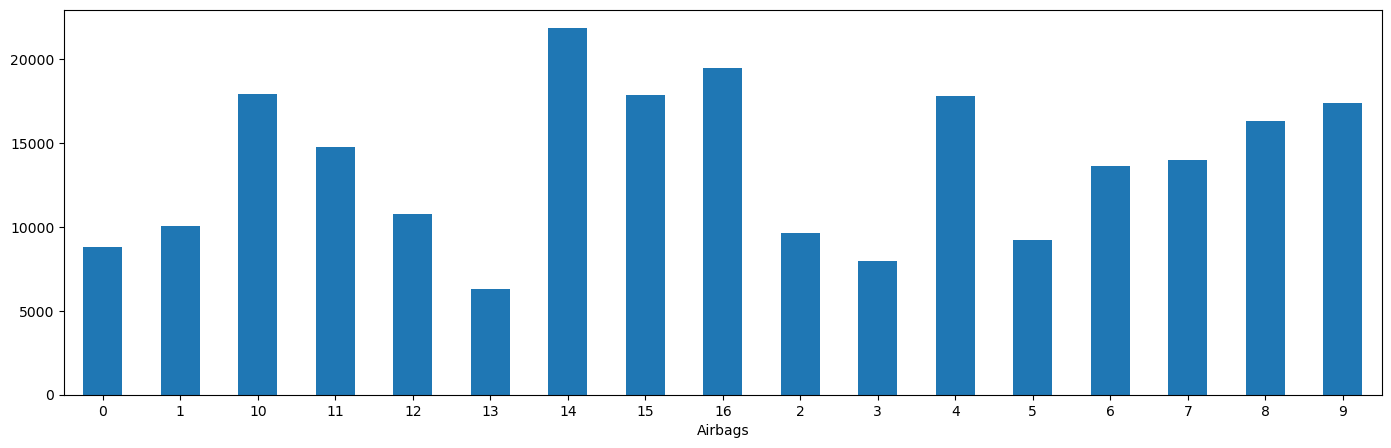

In [119]:
mean_price_by_Airbags = df.groupby(df_c['Airbags'])['Price'].mean()
plt.figure(figsize=(17, 5))
mean_price_by_Airbags.plot.bar(rot=0)

In [120]:
mean_price_by_Airbags

Airbags
0      8808.947520
1     10054.950820
10    17927.830565
11    14768.350000
12    10786.445545
13     6284.500000
14    21852.250000
15    17876.000000
16    19458.877193
2      9622.603053
3      7997.233333
4     17786.664677
5      9204.023529
6     13632.115789
7     14012.731343
8     16338.313804
9     17402.130435
Name: Price, dtype: float64

<AxesSubplot:xlabel='Engine_Type'>

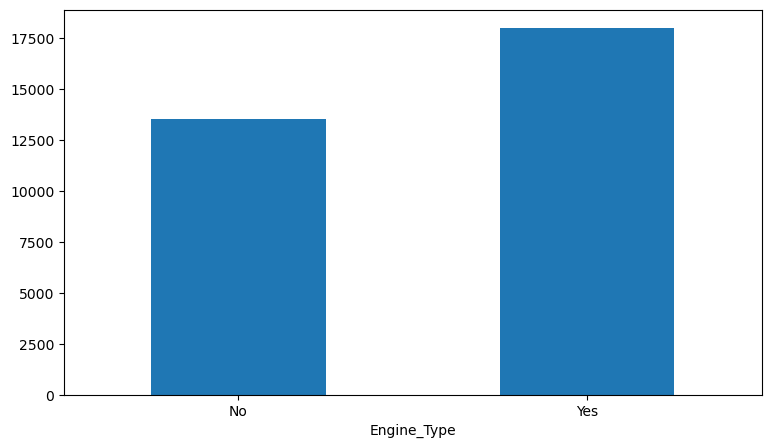

In [121]:
mean_price_by_Engine_Type = df.groupby(df_c['Engine_Type'])['Price'].mean()
plt.figure(figsize=(9, 5))
mean_price_by_Engine_Type.plot.bar(rot=0)

In [122]:
mean_price_by_Engine_Type

Engine_Type
No     13548.129617
Yes    18009.499232
Name: Price, dtype: float64

##### Multivariate Analysis

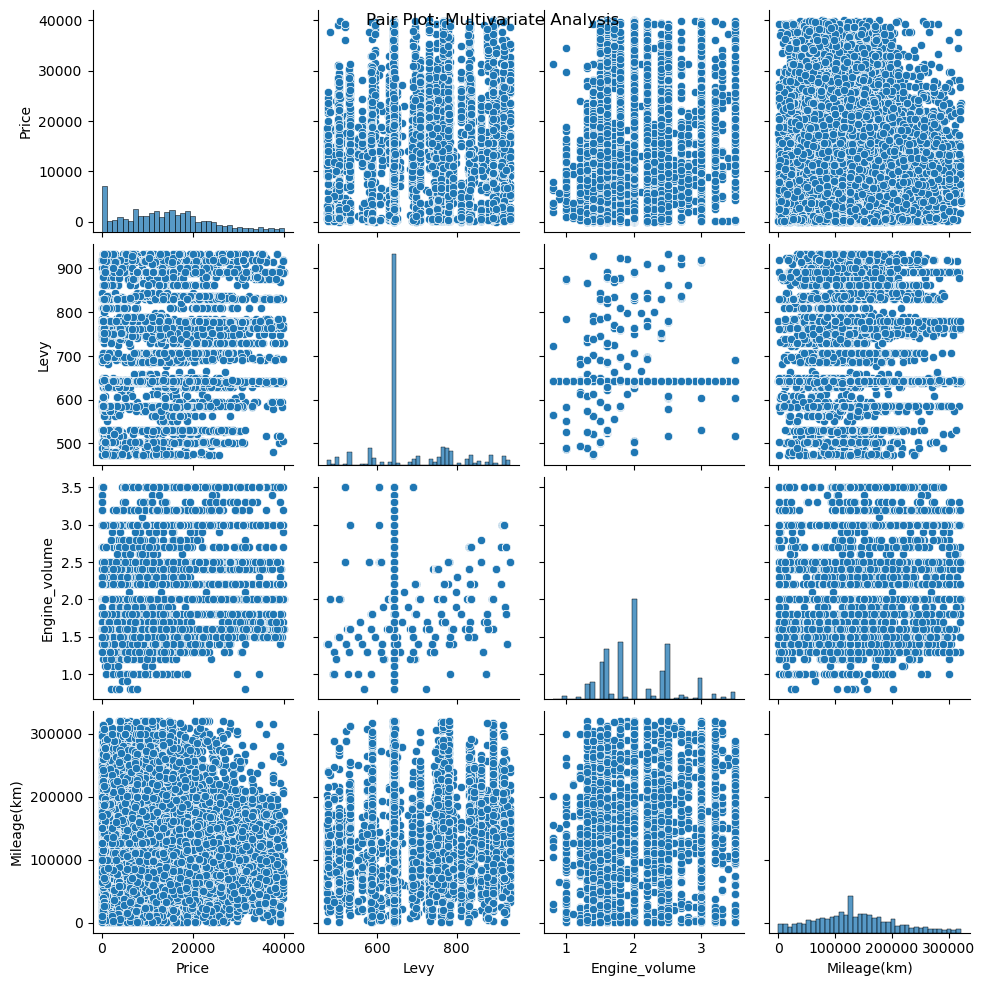

In [123]:
sns.pairplot(df_4)
plt.suptitle('Pair Plot: Multivariate Analysis')
plt.show()

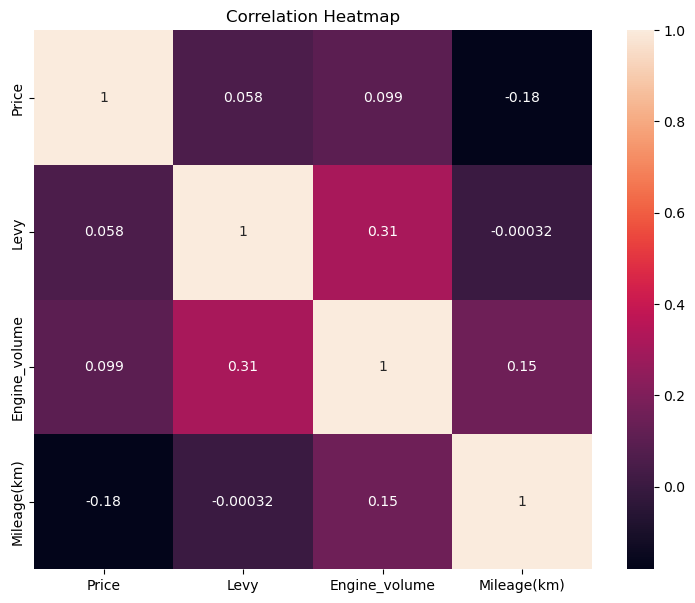

In [124]:
correlation_matrix = df_4.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [125]:
correlation_matrix

,Price,Levy,Engine_volume,Mileage(km)
Price,1.000000,0.057828,0.099438,-0.181028
Levy,0.057828,1.000000,0.308714,-0.000319
Engine_volume,0.099438,0.308714,1.000000,0.152933
Mileage(km),-0.181028,-0.000319,0.152933,1.000000


##### Encoding the categorical features (Frequency Encoding)

In [126]:
df_c.tail(30)

,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_Type
19189,LEXUS,RX 450,2016,Jeep,Yes,Hybrid,6.0,Automatic,Front,04,Left wheel,Silver,12,No
19190,SCION,xD,2010,Hatchback,No,Petrol,4.0,Automatic,Front,04,Left wheel,White,8,No
19191,MITSUBISHI,Pajero IO,1999,Jeep,No,Petrol,4.0,Automatic,4x4,04,Left wheel,Green,6,No
19193,HONDA,FIT,2004,Hatchback,No,Petrol,4.0,Variator,Front,04,Right-hand drive,Sky blue,2,No
19195,TOYOTA,Prius,2012,Hatchback,Yes,Hybrid,4.0,Automatic,Front,04,Left wheel,Black,12,No
19196,TOYOTA,RAV 4,2015,Jeep,Yes,Petrol,4.0,Automatic,4x4,04,Left wheel,Grey,0,No
19198,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,4.0,Tiptronic,Front,04,Left wheel,Red,12,Yes
19200,KIA,Optima,2015,Sedan,Yes,Petrol,4.0,Automatic,Front,04,Left wheel,Black,12,No
19201,TOYOTA,Prius,2011,Sedan,No,Hybrid,6.0,Automatic,Front,04,Left wheel,Grey,8,No
19202,HYUNDAI,Elantra,2013,Sedan,Yes,Petrol,4.0,Tiptronic,Front,04,Left wheel,White,12,No


In [127]:
# Copy the DataFrame to avoid modifying the original data
df_encoded = df_c.copy()

# List of categorical columns to encode
categorical_columns = ['Manufacturer', 'Model', 'Prod_year', 'Category', 'Leather_interior', 'Cylinders', 'Fuel_type', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Engine_Type']

# Frequency encode each categorical column
for col in categorical_columns:
    frequency_map = df_encoded[col].value_counts()
    df_encoded[col] = df_encoded[col].map(frequency_map)

df_encoded.tail(30)

,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_Type
19189,208,34,689,2548,7639,2077,1356,7718,8954,11228,10685,2558,2525,10531
19190,6,3,837,2134,4194,6576,10141,7718,8954,11228,10685,2866,1246,10531
19191,243,47,172,2548,4194,6576,10141,7718,1627,11228,10685,220,1045,10531
19193,681,325,281,2134,4194,6576,10141,590,8954,11228,1148,97,786,10531
19195,2264,807,1633,2134,7639,2077,10141,7718,8954,11228,10685,2615,2525,10531
19196,2264,91,848,2548,7639,6576,10141,7718,1627,11228,10685,1448,1391,10531
19198,800,2,1566,5814,7639,6576,10141,2056,8954,11228,10685,448,2525,1302
19200,316,202,848,5814,7639,6576,10141,7718,8954,11228,10685,2615,2525,10531
19201,2264,807,1073,5814,4194,2077,1356,7718,8954,11228,10685,1448,1246,10531
19202,2523,824,1566,5814,7639,6576,10141,2056,8954,11228,10685,2866,2525,10531


In [128]:
#concatinating the numeric and encoded categorical features
features = pd.concat([df_n, df_encoded], axis =1)
features.head()

,Levy,Engine_volume,Mileage(km),Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Engine_Type
2,642.0,1.3,200000.0,681,325,234,2134,4194,6576,10141,590,8954,11228,1148,2615,786,10531
3,862.0,2.5,168966.0,691,78,1073,2548,7639,2077,10141,7718,1627,11228,10685,2866,1391,10531
5,891.0,2.0,160931.0,2523,245,689,2548,7639,2208,10141,7718,8954,11228,10685,2866,3853,10531
6,761.0,1.8,258909.0,2264,807,837,2134,7639,2077,10141,7718,8954,11228,10685,2866,2525,10531
7,751.0,2.4,216118.0,2523,620,1566,5814,7639,6576,10141,7718,8954,11228,10685,1448,2525,10531


In [129]:
features.shape

(11833, 17)

In [130]:
len(Price)

11833

In [131]:
#splittingthe datadet into Train and Test
X_train, X_test, y_train, y_test = train_test_split(features, Price, random_state = 42, test_size = 0.3)

In [132]:
#Shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8283, 17), (3550, 17), (8283,), (3550,))

##### Feature Selection through RFE method

In [133]:
# Create an instance of the Linear Regression model
estimator = LinearRegression()

# Create an instance of RFE and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=10)

# Fit the RFE model on the data
rfe.fit(X_train, y_train)

# Get the support and ranking of each feature
selected_features = X_train.columns[rfe.support_]
ranking = rfe.ranking_

# Print the selected features and their rankings
print("Selected Features:")
print(selected_features)
print("\nFeature Rankings:")
print(ranking)

Selected Features:
Index(['Levy', 'Engine_volume', 'Manufacturer', 'Model', 'Prod_year',
       'Category', 'Gear_box_type', 'Wheel', 'Airbags', 'Engine_Type'],
      dtype='object')

Feature Rankings:
[1 1 8 1 1 1 1 3 7 6 1 5 4 1 2 1 1]


##### Training the models

In [134]:
X_train.drop(['Model', 'Leather_interior', 'Cylinders', 'Drive_wheels', 'Doors', 'Color'], axis = 1, inplace = True)
X_test.drop(['Model', 'Leather_interior', 'Cylinders', 'Drive_wheels', 'Doors', 'Color'], axis = 1, inplace = True)

In [135]:
X_train.head()

,Levy,Engine_volume,Mileage(km),Manufacturer,Prod_year,Category,Fuel_type,Gear_box_type,Wheel,Airbags,Engine_Type
11024,777.0,2.5,77803.0,2264,1188,5814,6576,2056,10685,1391,10531
107,917.0,3.0,137802.0,598,1566,2548,2208,7718,10685,2525,10531
8371,629.0,1.6,170000.0,2523,848,2134,2208,7718,10685,3853,10531
4669,790.0,1.6,112282.0,77,303,5814,6576,7718,10685,3853,10531
6044,642.0,1.8,203000.0,2264,837,2134,6576,7718,10685,1246,10531


##### Desicion Tree Regressor (Model 1)

In [136]:
# Create an instance of the Decision Tree Regressor
model_1 = DecisionTreeRegressor()

# Fit the model to the training data
model_1.fit(X_train, y_train)

# Make predictions on the train data
model_1_train_pred = model_1.predict(X_train)

# Make predictions on the train and test data
model_1_test_pred = model_1.predict(X_test)

# Evaluate the model on train and test data
model_1_Rmse_train = np.sqrt(mean_squared_error(y_train, model_1_train_pred))
model_1_Rmse_test = np.sqrt(mean_squared_error(y_test, model_1_test_pred))

model_1_Mape_train = mean_absolute_percentage_error(y_train, model_1_train_pred)
model_1_Mape_test = mean_absolute_percentage_error(y_test, model_1_test_pred)

#Results of Model_1
print("Root Mean Squared Error Train:", model_1_Rmse_train)
print("Root Mean Squared Error Test:", model_1_Rmse_test)
print("Mean absolute percentage error Train :", model_1_Mape_train)
print("Mean absolute percentage error Test :", model_1_Mape_test)

Root Mean Squared Error Train: 382.63413198972876
Root Mean Squared Error Test: 7017.203116035517
Mean absolute percentage error Train : 0.08086572927957568
Mean absolute percentage error Test : 12.667110096454046


##### HyperParmeter tuning by using grid search Method

In [137]:
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create an instance of the Decision Tree Regressor
model_1_T = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(model_1_T, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [138]:
#Create an instance of the Decision Tree Regressor with the best hyperparameters
best_model_1 = DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4, min_samples_split=10)

# Fit the model to the training data
best_model_1.fit(X_train, y_train)

# Make predictions on the train and test data
best_model_1_train_pred = best_model_1.predict(X_train)
best_model_1_test_pred = best_model_1.predict(X_test)

# Evaluate the model on the train and test data
rmse_train = np.sqrt(mean_squared_error(y_train, best_model_1_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, best_model_1_test_pred))
mape_train = mean_absolute_percentage_error(y_train, best_model_1_train_pred)
mape_test = mean_absolute_percentage_error(y_test, best_model_1_test_pred)

# Print the evaluation metrics
print("Root Mean Squared Error Train:", rmse_train)
print("Root Mean Squared Error Test:", rmse_test)
print("Mean absolute percentage error Train :", mape_train)
print("Mean absolute percentage error Test :", mape_test)

Root Mean Squared Error Train: 5018.69034113412
Root Mean Squared Error Test: 6218.8384742964645
Mean absolute percentage error Train : 9.699823071728256
Mean absolute percentage error Test : 13.57783335544492


##### Gardient Boosting Regressor(Model_2)

In [139]:
# Create an instance of the Gradient Boosting Regressor
model_2 = GradientBoostingRegressor()

# Fit the model to the training data
model_2.fit(X_train, y_train)

# Make predictions on the train and test data
model_2_train_pred = model_2.predict(X_train)
model_2_test_pred = model_2.predict(X_test)

# Evaluate the model on the train and test data
model_2_train_rmse = np.sqrt(mean_squared_error(y_train, model_2_train_pred))
model_2_test_rmse = np.sqrt(mean_squared_error(y_test, model_2_test_pred))
model_2_train_mape = mean_absolute_percentage_error(y_train, model_2_train_pred)
model_2_test_mape = mean_absolute_percentage_error(y_test, model_2_test_pred)


# Print the evaluation metrics
print("Root Mean Squared Error Train:", model_2_train_rmse)
print("Root Mean Squared Error Test:", model_2_test_rmse)
print("Mean absolute percentage error Train :", model_2_train_mape)
print("Mean absolute percentage error Test :", model_2_test_mape)

Root Mean Squared Error Train: 6069.887130110536
Root Mean Squared Error Test: 6438.498144095965
Mean absolute percentage error Train : 12.07237305006813
Mean absolute percentage error Test : 14.1967574144579


##### HyperParmeter tuning by using grid search Method

In [140]:
# Create an instance of the Gradient Boosting Regressor
model_2_T = GradientBoostingRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(model_2_T, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [141]:
# Create an instance of the Gradient Boosting Regressor with the best hyperparameters
best_model_2 = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=150)

# Fit the model to the training data
best_model_2.fit(X_train, y_train)

# Make predictions on the test data
best_model_2_train_pred = best_model_2.predict(X_train)
best_model_2_test_pred = best_model_2.predict(X_test)

# Evaluate the model on the test data
# Evaluate the model on the train and test data
model_2_train_rmse = np.sqrt(mean_squared_error(y_train, best_model_2_train_pred))
model_2_test_rmse = np.sqrt(mean_squared_error(y_test, best_model_2_test_pred))
model_2_train_mape = mean_absolute_percentage_error(y_train, best_model_2_train_pred)
model_2_test_mape = mean_absolute_percentage_error(y_test, best_model_2_test_pred)

# Print the evaluation metrics
print("Root Mean Squared Error Train:", model_2_train_rmse)
print("Root Mean Squared Error Test:", model_2_test_rmse)
print("Mean absolute percentage error Train :", model_2_train_mape)
print("Mean absolute percentage error Test :", model_2_test_mape)

Root Mean Squared Error Train: 3131.4949343294165
Root Mean Squared Error Test: 5320.799472729593
Mean absolute percentage error Train : 6.600511732854318
Mean absolute percentage error Test : 13.334004598553662


##### Pickle File

In [142]:
import pickle

# Save the trained model as a pickle file
with open('Car_Price_Prediction_model.pkl', 'wb') as f:
    pickle.dump(model_2, f)